In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from utils.data_loading import load_disruption_distance, load_papers
import numpy as np
import matplotlib.font_manager as font_manager
from scipy.stats import spearmanr

In [3]:
font_path = '../data/font/helvetica.ttf'
font_manager.fontManager.addfont(font_path)

prop = font_manager.FontProperties(family='Helvetica')

# Data Loading

In [4]:
papers_df = load_papers('/data/sg/munjkim/APS/paper_table.csv')
papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category
0,0,10.1103/PhysRev.1.124,1913.0,1913-02-01,PR,An Absolute Determination of the Viscosity of Air,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10.1103/PhysRev.1.16,1913.0,1913-01-01,PR,The Velocity of Electrons in the Photo-electri...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10.1103/PhysRev.1.218,1913.0,1913-03-01,PR,Brownian Movements in Gases at Low Pressures,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10.1103/PhysRev.1.237,1913.0,1913-03-01,PR,Proceedings of the American Physical Society,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10.1103/PhysRev.1.259,1913.0,1913-04-01,PR,The Annealing of Steel in an Alternating Magne...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
net = scipy.sparse.load_npz("/data/sg/munjkim/APS/original/citation_net.npz")

In [6]:
#citation network
citations = np.array(net.sum(axis=0))[0]
references = np.array(net.sum(axis=1)).reshape((1,-1))[0]
papers_df['citations'] = papers_df['paper_id'].apply(lambda x: citations[x])
papers_df['references'] = papers_df['paper_id'].apply(lambda x: references[x])
papers_df = papers_df[papers_df['citations']>4]
papers_df = papers_df[papers_df['references']>0]

In [7]:
papers_df = papers_df[papers_df['year']<2017]

In [8]:
papers_df .head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category,citations,references
34,34,10.1103/PhysRev.10.495,1917.0,1917-11-01,PR,The Ionizing Potentials of Gases,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0
39,39,10.1103/PhysRev.10.591,1917.0,1917-12-01,PR,Unipolar Induction and Electron Theory,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0
40,40,10.1103/PhysRev.10.609,1917.0,1917-12-01,PR,Total Ionization by slow Electrons,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0
44,44,10.1103/PhysRev.10.661,1917.0,1917-12-01,PR,A New Method of X-Ray Crystal Analysis,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2.0
51,51,10.1103/PhysRev.100.1,1955.0,1955-10-01,PR,Independent-Particle Model of the Nucleus. II....,NaN,NaN,NaN,NaN,NaN,NaN,36.0,23.0


In [9]:
NETWORKS_NAME = ['original']
MEASURE = ['disruption','disruption_2step',
           '100_1_q_1_ep_1_bs_1024_embedding/distance',
           '100_5_q_1_ep_1_bs_1024_embedding/distance',
           '100_3_q_1_ep_1_bs_1024_embedding/distance',
           ]

for net in NETWORKS_NAME:
    for m in MEASURE:
        papers_df = load_disruption_distance(papers_df,net,m,data='aps')


# Robustness Comparison

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_574016/3504626258.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$',size=30)


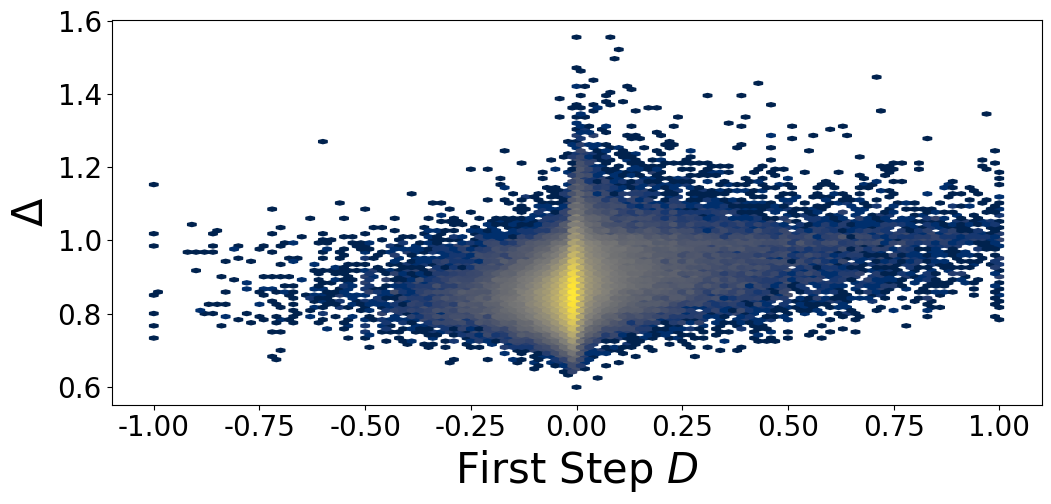

In [24]:
plt.figure(figsize = (12,5))
plt.hexbin(papers_df['original_disruption'] , papers_df['original_100_5_q_1_ep_1_bs_1024_embedding_distance'] ,norm=matplotlib.colors.LogNorm(),cmap = 'cividis')
plt.xlabel('First Step $D$',size=30)

plt.ylabel('$\Delta$',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.savefig('../results/Figures/First_step_delta_comparison_100_5.png',bbox_inches='tight')

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_574016/2927179722.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$',size=30)


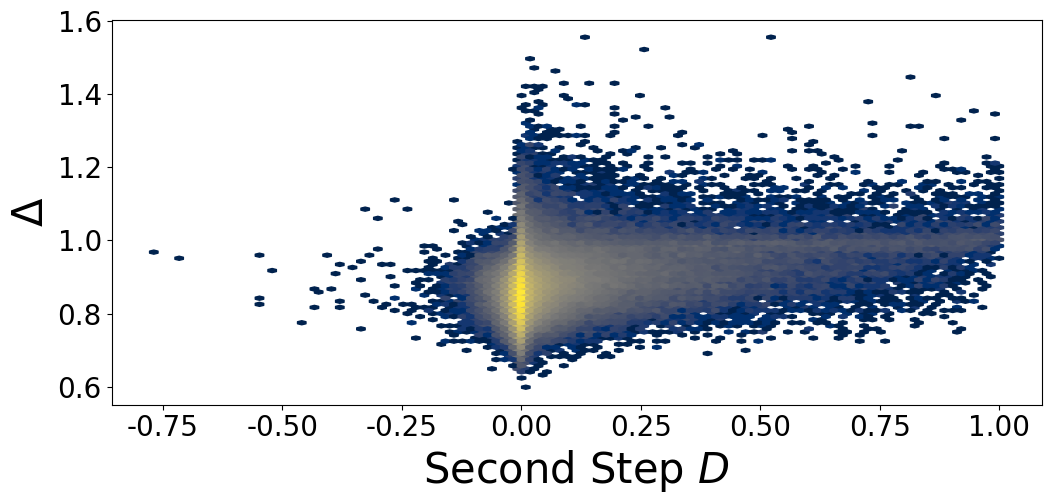

In [25]:
plt.figure(figsize = (12,5))
plt.hexbin(papers_df['original_disruption_2step'] ,papers_df['original_100_5_q_1_ep_1_bs_1024_embedding_distance'] ,norm=matplotlib.colors.LogNorm(),cmap = 'cividis')
plt.xlabel('Second Step $D$',size=30)

plt.ylabel('$\Delta$',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.savefig('../results/Figures/Second_step_delta_comparison_100_5.png',bbox_inches='tight')

In [15]:

# Calculate the correlation coefficient and the p-value
x = papers_df['original_disruption_2step']
y = papers_df['original_100_5_q_1_ep_1_bs_1024_embedding_distance']

corr_coef, p_value = spearmanr(x[~np.isnan(y)],y[~np.isnan(y)])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)


Correlation coefficient: 0.2682245627541442
P-value: 0.0


In [16]:

# Calculate the correlation coefficient and the p-value
x = papers_df['original_disruption']
y = papers_df['original_100_5_q_1_ep_1_bs_1024_embedding_distance']

corr_coef, p_value = spearmanr(x[~np.isnan(y)],y[~np.isnan(y)])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)


Correlation coefficient: 0.24026431335436688
P-value: 0.0


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_574016/1491257428.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$',size=30)


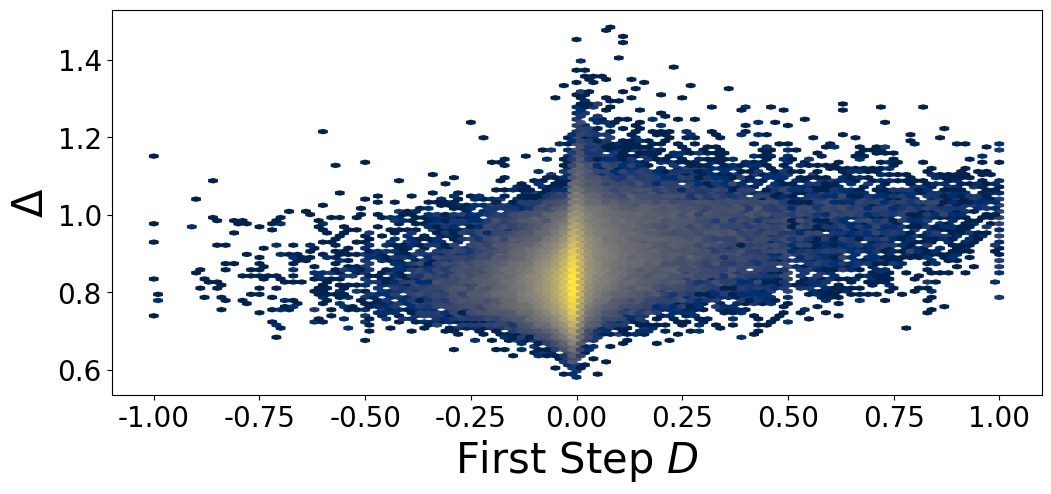

In [26]:
plt.figure(figsize = (12,5))
plt.hexbin(papers_df['original_disruption'] , papers_df['original_100_3_q_1_ep_1_bs_1024_embedding_distance'] ,norm=matplotlib.colors.LogNorm(),cmap = 'cividis')
plt.xlabel('First Step $D$',size=30)

plt.ylabel('$\Delta$',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.savefig('../results/Figures/First_step_delta_comparison_100_3.png',bbox_inches='tight')

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_574016/2063385895.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$',size=30)


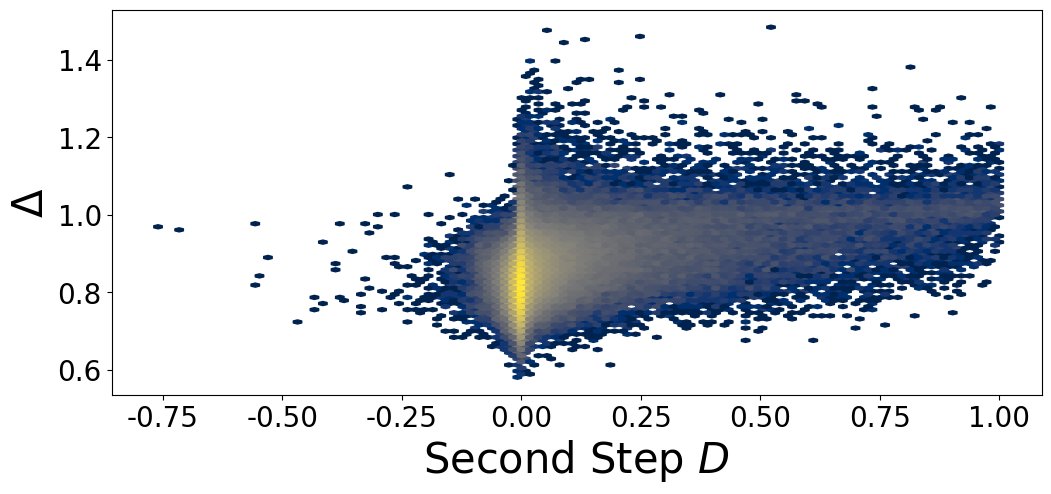

In [27]:
plt.figure(figsize = (12,5))
plt.hexbin(papers_df['original_disruption_2step'] ,papers_df['original_100_3_q_1_ep_1_bs_1024_embedding_distance'] ,norm=matplotlib.colors.LogNorm(),cmap = 'cividis')
plt.xlabel('Second Step $D$',size=30)

plt.ylabel('$\Delta$',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.savefig('../results/Figures/Second_step_delta_comparison_100_3.png',bbox_inches='tight')

In [22]:

# Calculate the correlation coefficient and the p-value
x = papers_df['original_disruption_2step']
y = papers_df['original_100_3_q_1_ep_1_bs_1024_embedding_distance']

corr_coef, p_value = spearmanr(x[~np.isnan(y)],y[~np.isnan(y)])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)


Correlation coefficient: 0.3346526865446239
P-value: 0.0


In [23]:

# Calculate the correlation coefficient and the p-value
x = papers_df['original_disruption']
y = papers_df['original_100_3_q_1_ep_1_bs_1024_embedding_distance']

corr_coef, p_value = spearmanr(x[~np.isnan(y)],y[~np.isnan(y)])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)


Correlation coefficient: 0.23077807892201924
P-value: 0.0


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_574016/4246009400.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$',size=30)


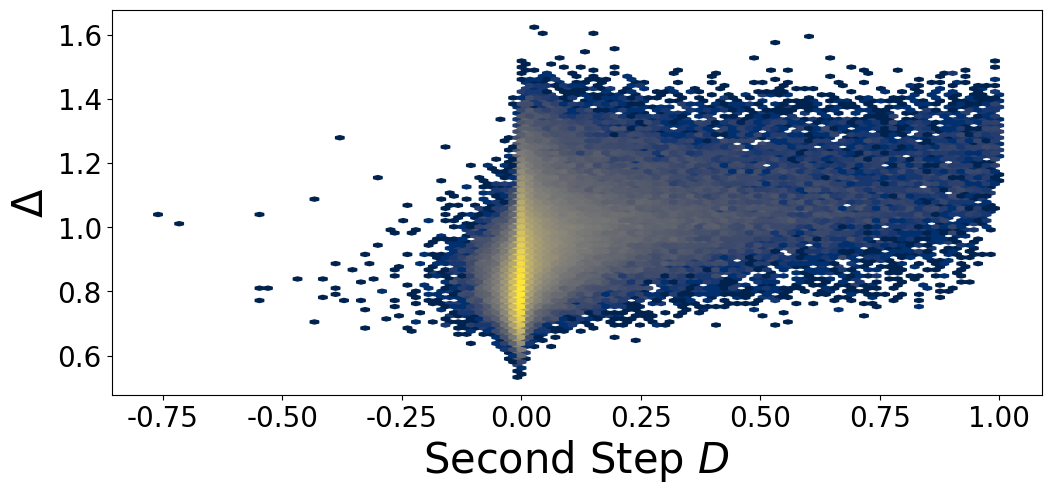

In [28]:
plt.figure(figsize = (12,5))
plt.hexbin(papers_df['original_disruption_2step'] ,papers_df['original_100_1_q_1_ep_1_bs_1024_embedding_distance'] ,norm=matplotlib.colors.LogNorm(),cmap = 'cividis')
plt.xlabel('Second Step $D$',size=30)

plt.ylabel('$\Delta$',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.savefig('../results/Figures/Second_step_delta_comparison_100_1.png',bbox_inches='tight')

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_574016/989545611.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$',size=30)


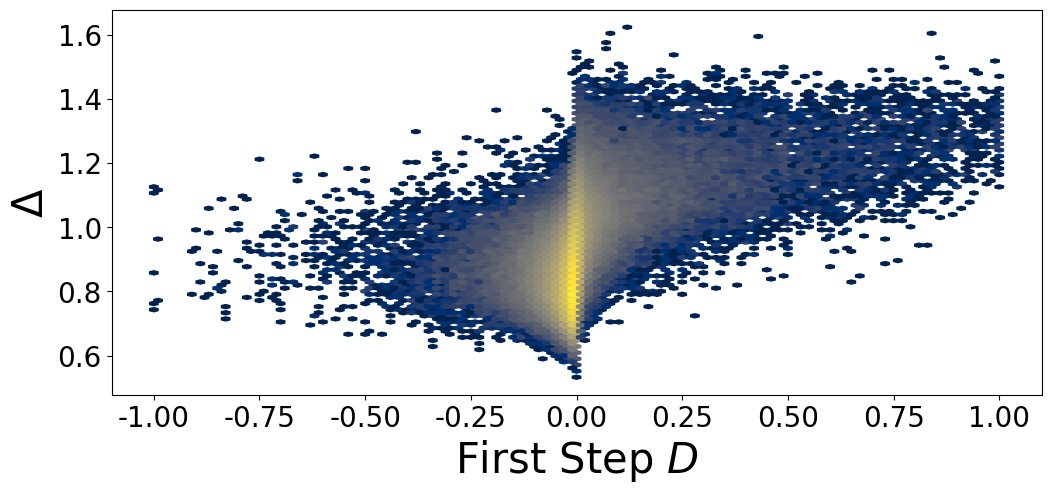

In [29]:
plt.figure(figsize = (12,5))
plt.hexbin(papers_df['original_disruption'] , papers_df['original_100_1_q_1_ep_1_bs_1024_embedding_distance'] ,norm=matplotlib.colors.LogNorm(),cmap = 'cividis')
plt.xlabel('First Step $D$',size=30)

plt.ylabel('$\Delta$',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
matplotlib.rcParams['axes.unicode_minus'] = False
plt.savefig('../results/Figures/First_step_delta_comparison_100_1.png',bbox_inches='tight')

In [31]:

# Calculate the correlation coefficient and the p-value
x = papers_df['original_disruption_2step']
y = papers_df['original_100_1_q_1_ep_1_bs_1024_embedding_distance']

corr_coef, p_value = spearmanr(x[~np.isnan(y)],y[~np.isnan(y)])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)


Correlation coefficient: 0.5560827612057239
P-value: 0.0


In [32]:

# Calculate the correlation coefficient and the p-value
x = papers_df['original_disruption']
y = papers_df['original_100_1_q_1_ep_1_bs_1024_embedding_distance']

corr_coef, p_value = spearmanr(x[~np.isnan(y)],y[~np.isnan(y)])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)


Correlation coefficient: 0.3820762642562516
P-value: 0.0
